<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/4105_Homework1_Prob1_Meyer_Eli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
##
## These are all of the nessesary libraries for this that are imported as well as my google drive.
##

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#My google drive path to the CSV file for the raw data
data = '/content/drive/MyDrive/4105/D3.csv'

df = pd.read_csv(data)

# Display the first 5 rows of the DataFrame
print(df.head())


         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [88]:
X = df.values[:, 0:3]  # get all input values in a 3 column arrray
y = df.values[:, -1]  # get output values from second column -- Y is the list here
m = len(y)  # Number of input examples
n = len(X)  #
print(X[:5])
print(y[:5])

[[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]
[4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


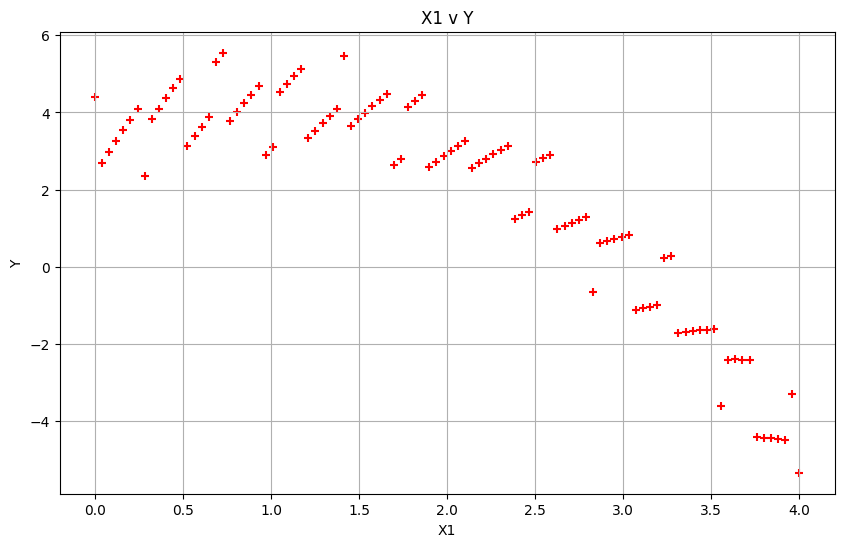

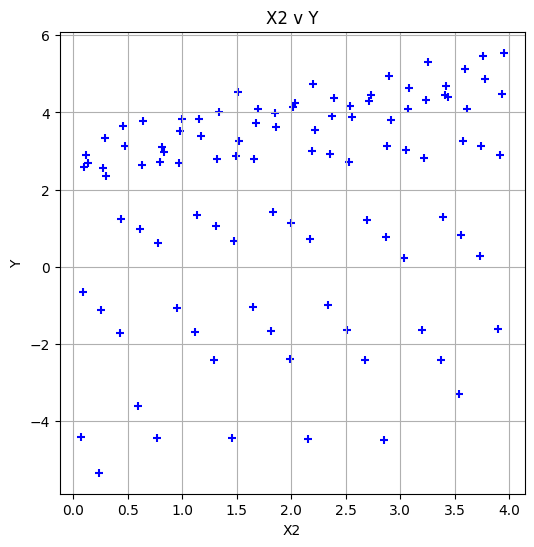

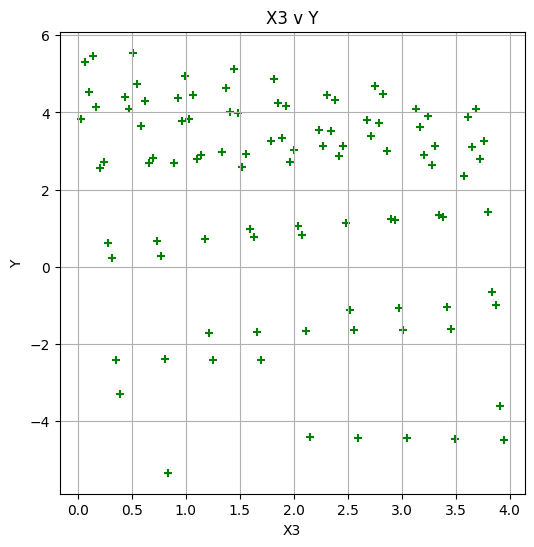

In [89]:
#Plotting the X1 v Y scatter plot
plt.scatter(X[:,0], y, color='red', marker='+')

plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('X1 v Y')

plt.show()

#Plotting the X2 v Y scatter plot

plt.scatter(X[:,1], y, color='blue', marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('X2 v Y')

plt.show()

#Plotting the X3 v Y scatter plot

plt.scatter(X[:,2], y, color='green', marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('X3 v Y')

plt.show()


In [90]:
## A array of ones the length of the input data is created
X_0 = np.ones((m,1))

## The three input values are seperated to be used in seperate calculations

X_1 = X[:,0].reshape(m,1)
X_2 = X[:,1].reshape(m,1)
X_3 = X[:,2].reshape(m,1)

# The first 5 rows of each each are printed

print(X_1[:5])
print(X_2[:5])
print(X_3[:5])


[[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]
[[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]
[[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [91]:
## The 3 input vectors areindividually horizontally combined with the array of 1 to make a 2 column arrary

X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))

## The first 5 rows of each each are printed

print(X1[:5])
print(X2[:5])
print(X3[:5])

[[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
[[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
[[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [92]:
theta = np.zeros(2)
theta

## The theta values are initialized and printed

array([0., 0.])

In [93]:
def compute_cost(X, y, theta):

    ## cost function
    ## It multiplies the input array by the theta values to find the predicted Y value.
    ## The predicted value is then sutracted from the actaul Y value to find the error, which is squared
    ## The sum of the squared errors divided by twice the 2 length of the input array is then returned as J


    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [94]:
## The Cost Fucntion is ran for all three variable indepedently and J value printed

cost1 = compute_cost(X1, y, theta)
cost2 = compute_cost(X2, y, theta)
cost3 = compute_cost(X3, y, theta)
print(theta)
print(cost1)
print(cost2)
print(cost3)

[0. 0.]
5.524438459196242
5.524438459196242
5.524438459196242


In [95]:

def gradient_descent(X, y, theta, alpha, iterations):

    ## Gradient Descent Function
    ## To find the optimal theta values for the Cost function
    ## The iterations is the amount of time this function is run
    ## The alpha is the learning rate
    ## The function returns the uptataed theta values and cost

    m = len(y)
    cost = np.zeros(iterations)

    for j in range(iterations):
        y_hat = X.dot(theta)
        errors = np.subtract(y_hat, y)

        delta = (alpha / m) * X.transpose().dot(errors)

        theta = theta - delta
        cost[j] = compute_cost(X, y, theta)

    return theta, cost

In [96]:
## The three Theta values are inilaized as well as iterations and alpha value

theta1 = [0., 0.]
theta2 = [0., 0.]
theta3 = [0., 0.]
iterations = 5000
alpha = 0.04

In [97]:
## The Gradient Descent Function is ran and printed for X1

theta_1, cost1 = gradient_descent(X1, y, theta1, alpha, iterations)
print(theta_1)
print(cost1)

[ 5.92794892 -2.03833663]
[5.36472185 5.24211647 5.14119415 ... 0.98499308 0.98499308 0.98499308]


In [98]:
## The Gradient Descent Function is ran and printed for X2

theta_2, cost2 = gradient_descent(X2, y, theta2, alpha, iterations)
print(theta_2)
print(cost2)

[0.73606043 0.55760761]
[4.70583087 4.23968843 3.97417336 ... 3.59936602 3.59936602 3.59936602]


In [99]:
## The Gradient Descent Function is ran and printed for X3

theta_3, cost3 = gradient_descent(X3, y, theta3, alpha, iterations)
print(theta_3)
print(cost3)

[ 2.8714221  -0.52048288]
[5.0989703  4.84545288 4.69183518 ... 3.62945112 3.62945112 3.62945112]


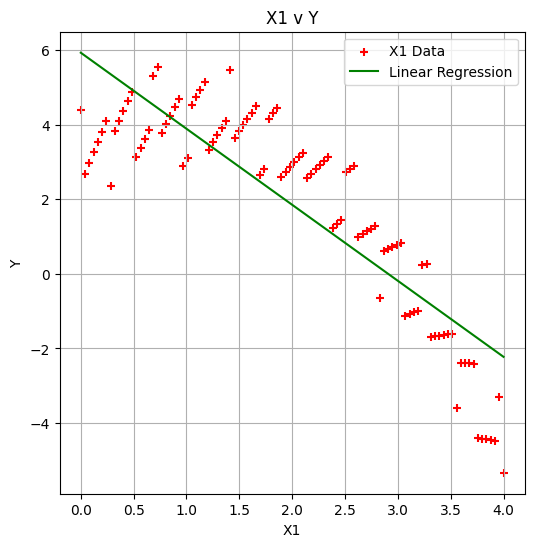

In [100]:
## Plot the X1 Scatter plot vs the linear regression line got from the gradient descent function
## using the theta values.

plt.scatter(X[:,0], y, color='red', marker='+', label='X1 Data')

plt.plot(X[:,0], X1.dot(theta_1), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('X1 v Y')
plt.legend()

plt.show()

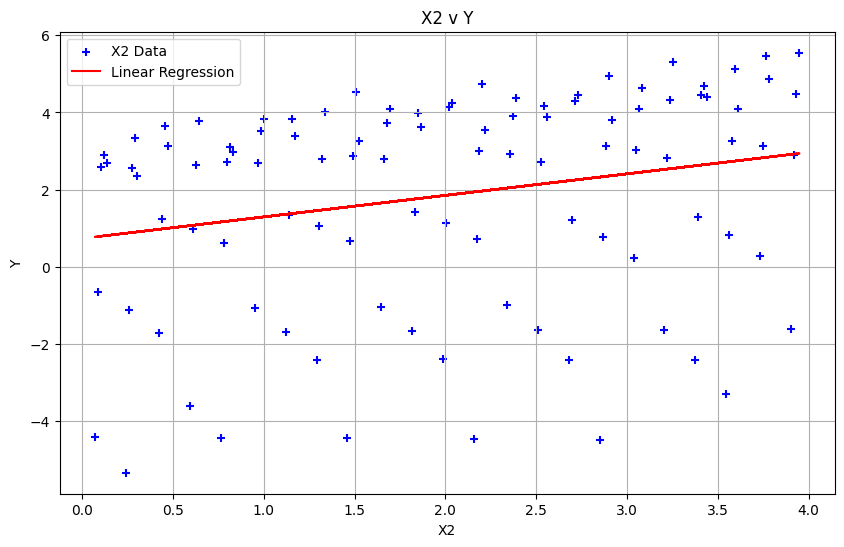

In [101]:
## Plot the X2 Scatter plot vs the linear regression line got from the gradient descent function
## using the theta values.

plt.scatter(X[:,1], y, color='blue', marker='+', label='X2 Data')

plt.plot(X[:,1], X2.dot(theta_2), color='red', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('X2 v Y')
plt.legend()

plt.show()

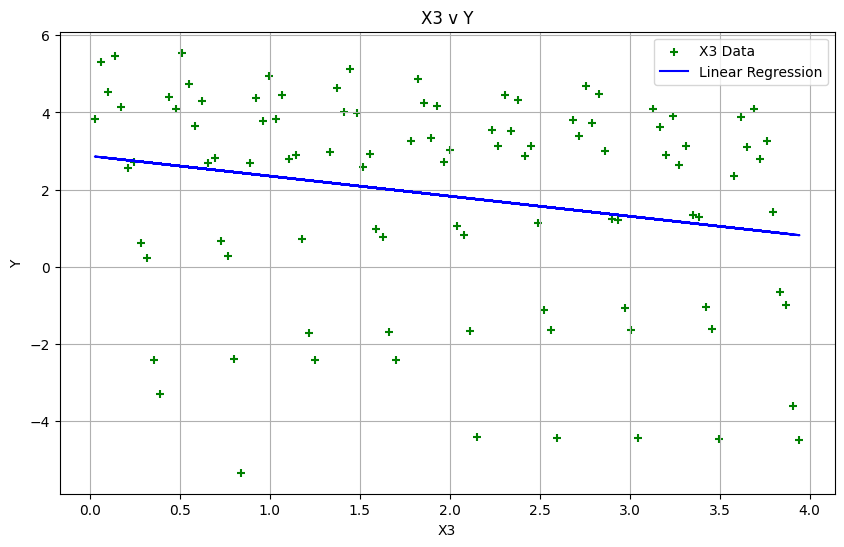

In [102]:
## Plot the X1 Scatter plot vs the linear regression line got from the gradient descent function
## using the theta values.

plt.scatter(X[:,2], y, color='green', marker='+', label='X3 Data')

plt.plot(X[:,2], X3.dot(theta_3), color='blue', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('X3 v Y')
plt.legend()

plt.show()

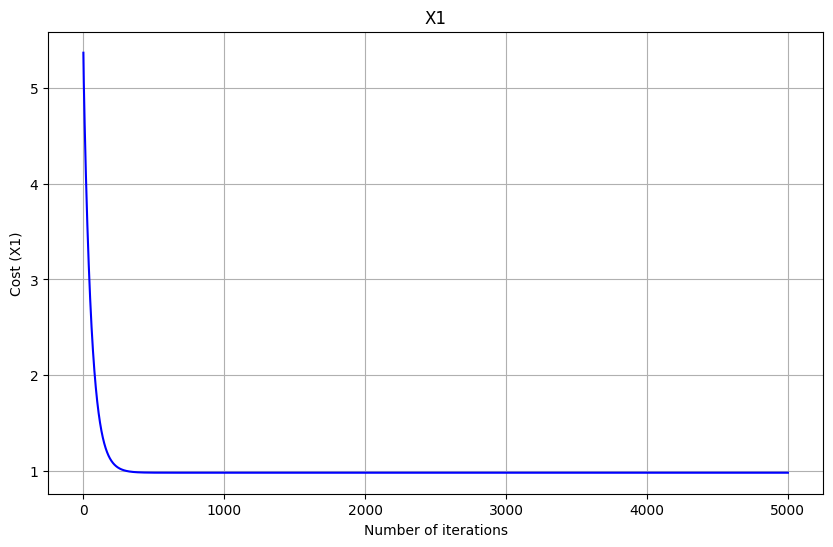

In [103]:
## The Plot of the convergence of the gradient Descent of X1

r=range(1, iterations + 1)

plt.plot(r, cost1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (X1)')
plt.title('X1')

plt.show()

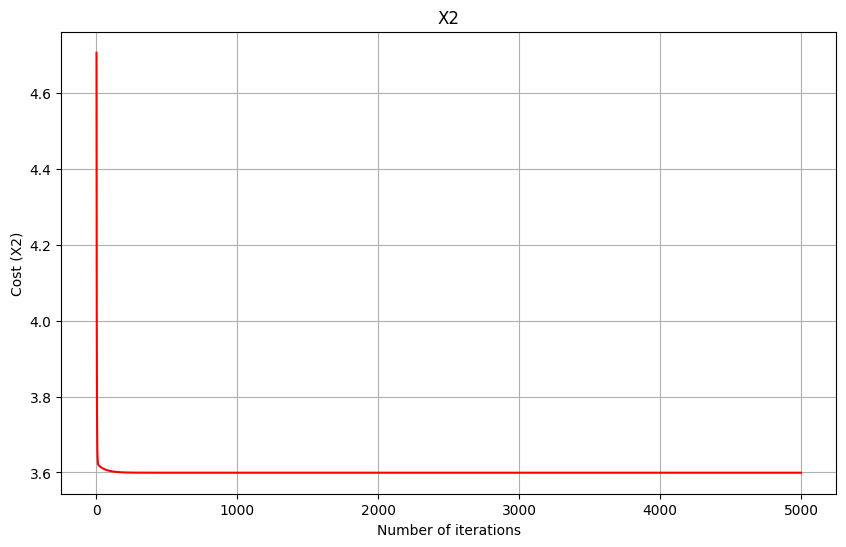

In [104]:
## The Plot of the convergence of the gradient Descent of X2

plt.plot(r, cost2, color='Red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (X2)')
plt.title('X2')

plt.show()

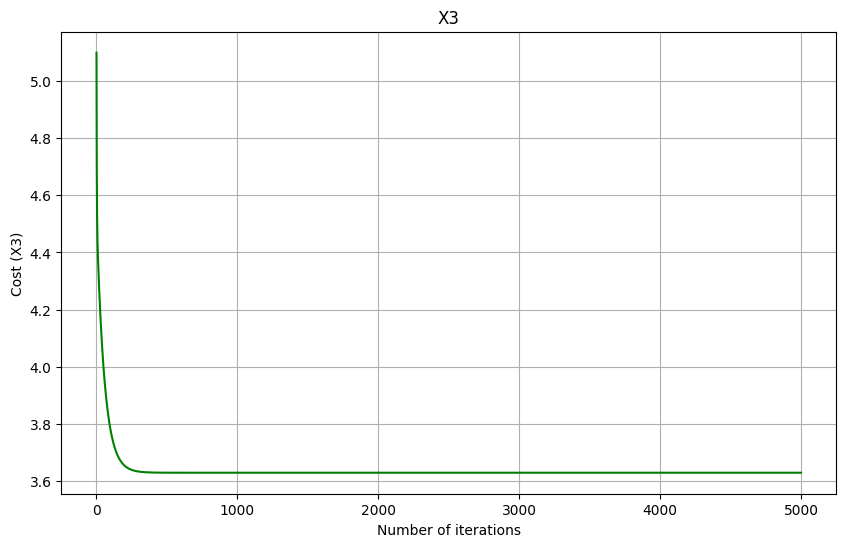

In [105]:
## The Plot of the convergence of the gradient Descent of X1

plt.plot(r, cost3, color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (X3)')
plt.title('X3')

plt.show()